# Sensitivity Analysis
Indicators from Sensitivity Survey B will be summarized across communities by fishing practice for visualization using ArcGIS

## Set up
Load the necessary data and transform for analysis

In [1]:
# load packages 

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
# load table with identifying species info
species = pd.read_csv("/home/rthoms/ocean_dep/sur_B/clean_up/species.csv", dtype={'resource_id': object})

# rename the resource-id column for merging 
species.rename(columns={'resource_id':'focal_resource'}, inplace=True)

# create a list of resources that will serve as columns in the pivot table
# names
pivot_columns = list(species[species['focal']==1]['scientific'])
# id #s
resources = list(species[species['focal']==1]['focal_resource'])
resources

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '10',
 '11',
 '50',
 '52',
 '53',
 '54',
 '55',
 '56',
 '60',
 '61',
 '63',
 '64',
 '68',
 '69',
 '70',
 '71',
 '74',
 '78']

In [3]:
# specifiy indicator to be analyzed
indicator = "tradition"

# define high level variables given the indicator
if indicator == "income":
    path = "/home/rthoms/ocean_dep/sur_B/capture_table_clean.csv"
    col_list=['prop_income_hot', 'prop_income_cold']
    df = pd.read_csv(path, dtype={'focal_resource': object})
    col = 'prop_income_hot'
    id = 'id'
    pivot_columns.append('nonfish_activities')
    resources.append('99')

elif indicator == "tradition":
    path = "/home/rthoms/ocean_dep/sur_B/trad_table_clean.csv"
    col_list=['tradition']
    df = pd.read_csv(path, dtype={'resource_id': object})
    df.rename(columns={'resource_id':'focal_resource'}, inplace=True)
    col = 'tradition'
    id = 'id'

elif indicator == "identity":
    path = "/home/rthoms/ocean_dep/sur_B/iden_table_clean.csv"
    col_list=['identity']
    df = pd.read_csv(path, dtype={'resource_id': object})
    df.rename(columns={'resource_id':'focal_resource'}, inplace=True)
    col = 'identity'
    id = 'id'

elif indicator == "nutrition":
    path = "/home/rthoms/ocean_dep/sur_B/nutrition_table_clean.csv"
    col_list=['nutrition_prop_hot']
    df = pd.read_csv(path, dtype={'nutrition_source': object})
    df.rename(columns={'nutrition_source':'focal_resource'}, inplace=True)
    col ='nutrition_prop_hot'
    id = "ParentGlobalID"
    pivot_columns.append('nonfish_meat')
    resources.append('99')

# specify ordering of categorical data
df.sg_dep_cat= pd.Categorical(df.sg_dep_cat,categories=["none","mod","high"],ordered=True)
df.pract_cat = pd.Categorical(df.pract_cat,categories=["fish","shrimp_net","glean"],ordered=True)

# drop unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

df

,focal_resource,sg_dep_median,sg_dep_cat,tradition,ParentGlobalID,gitonga_s,gitonga_p,portuguese,scientific,family,phylum,category,focal,id,ccp,gender,fish_pract,pract_cat
0,01,0.0,none,1.0,d63dc568-99da-438e-bd41-3a79bf13b0d9,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,07022023CUGBO8,kuguana,f,glean,glean
1,03,0.5,none,1.0,5861a90d-3554-4a81-b5e8-e8f9870b88fb,salani,NaN,Melanúria timoneira,Gerres longirostris,Gerreidae,bony fish,fish,1.0,04022023CHAB02,chamane,m,hand_line,fish
2,70,0.0,none,1.0,1469e0fd-0691-405e-b1e8-c144e854fbb7,nhakumbe,NaN,Amêijoa,Serratina capsoides,Tellinidae,mollusc,bivalve,1.0,09022023NHMPB03,nhampossa,f,shrimp_net,shrimp_net
3,78,0.0,none,1.0,a9325c3b-f81d-431a-9628-6b0b57ede5e3,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,09022023NHMPB05,nhampossa,f,gill_net,fish
4,70,0.0,none,1.0,e12a739b-ed4a-4ff7-94db-d034a066dd23,nhakumbe,NaN,Amêijoa,Serratina capsoides,Tellinidae,mollusc,bivalve,1.0,08022023MADB01,madava,f,shrimp_net,shrimp_net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,01,0.0,none,NaN,6cd30d28-9c1e-4148-a597-7b9d40fc1ae2,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,18022023ILHB04,ilha,m,shrimp_net,shrimp_net
231,01,0.0,none,NaN,f5769b1d-ab41-4ec3-9364-13194af91f08,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,19022023ILHB05,ilha,m,hand_line,fish
232,03,0.5,none,NaN,f5769b1d-ab41-4ec3-9364-13194af91f08,salani,NaN,Melanúria timoneira,Gerres longirostris,Gerreidae,bony fish,fish,1.0,19022023ILHB05,ilha,m,hand_line,fish
233,03,0.5,none,NaN,c0927898-6afe-4a7f-98d1-4ec395b0e647,salani,NaN,Melanúria timoneira,Gerres longirostris,Gerreidae,bony fish,fish,1.0,1902023ILHB06,ilha,f,glean,glean


The data frame is currently arranged by resource and respondent identifying the resource. We will need to add zero values for all resources not identified by a particular respondent

In [4]:
# Note length of raw df
print("length of df = " + str(len(df)))

length of df = 235


In [5]:
# Create an empty dataset with all ID, resource pairs
ids = list(df[id].unique())

levels = [resources,ids]
new_index = pd.MultiIndex.from_product(levels, names=['focal_resource',id])
df_0 = pd.DataFrame(index=new_index, columns=col_list).fillna(0) 

# Calculte size of df of 0s 
print("resources =" + str(resources) + " length =" + str(len(resources)))
print("ids =" + str(ids) + " length =" + str(len(ids)) )
print("df of 0s length " + str(len(ids)*len(resources)))
print("actual size = " + str(len(df_0)))

# drop any pairs that are already in the dataframe
df_index = df.set_index(['focal_resource',id])
index_list= (list(df_index.index))
df_0.drop(index_list, axis=0, inplace=True)
df_0.reset_index(inplace=True)
print("removing existing entries - " + str(len(df_0)))

# add back in the ccp column
df_0= pd.merge(df_0,df[[id,'ccp']].drop_duplicates(), on=id,how='left')
print("adding in cpp column should not change length - " + str(len(df_0)))

#merge
df_0 = pd.merge(df_0,species,on='focal_resource', how='left')

# stack the two DataFrames
df_filled = pd.concat([df, df_0], ignore_index=True, axis=0)
df_filled.sort_values(['focal_resource', 'ccp'],inplace=True)
df_filled.focal_resource.unique()


resources =['01', '02', '03', '04', '05', '06', '07', '10', '11', '50', '52', '53', '54', '55', '56', '60', '61', '63', '64', '68', '69', '70', '71', '74', '78'] length =25
ids =['07022023CUGBO8', '04022023CHAB02', '09022023NHMPB03', '09022023NHMPB05', '08022023MADB01', '08022023MADB05', '08022023MADB06', '08022023MADB07', '08022023MADB08', '09032023NHCHB08', '14022023SAHB03', '04032023NGUB03', '16022023NHMUB04', '16022023NHMUB05', '01022023MOR04', '07022023CUGB03', '01022023MORBO5', '01022023MORB07', '13022023NHMUB03', '07022023CUGB05', '04032023NGUB06', '01022023MORB02', '08022023MADB02', '04032023NGUB05', '04032023NGUB04', '13022023NHAMUB02', '14022023SAHB04', '02022023MARB02', '17022023NHCHB03', '13022023NHMUB01', '15022023JOSB03', '16022023NHMUB06', '14022023SAHB08', '07022023CUGB06', '31012023MUCB01', '09022023NHMPB02', '02022023MARB04', 'O1O22023MOR06', '04022023CHAB07', '02022023MARB06', '31012023MUB02', '04022023CHAB01', '01022023MORB01', '31012023MUCB07', '02022023MARB09', '0

array(['01', '02', '03', '04', '05', '06', '07', '10', '11', '50', '52',
       '53', '54', '55', '56', '60', '61', '63', '64', '68', '69', '70',
       '71', '74', '78'], dtype=object)

In [6]:
df_filled

,focal_resource,sg_dep_median,sg_dep_cat,tradition,ParentGlobalID,gitonga_s,gitonga_p,portuguese,scientific,family,phylum,category,focal,id,ccp,gender,fish_pract,pract_cat,communities,seagrass
45,01,0.0,none,0.533333,6b249316-c1e7-4f4f-a49f-435e11af63a2,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,04022023CHAB07,chamane,m,gill_net,fish,NaN,NaN
48,01,0.0,none,0.533333,21b02f45-d7ae-4f05-9a52-89dad34349af,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,04022023CHAB01,chamane,m,glean,glean,NaN,NaN
50,01,0.0,none,0.533333,6b249316-c1e7-4f4f-a49f-435e11af63a2,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,04022023CHAB07,chamane,m,glean,glean,NaN,NaN
53,01,0.0,none,0.533333,6b249316-c1e7-4f4f-a49f-435e11af63a2,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,04022023CHAB07,chamane,m,shrimp_net,shrimp_net,NaN,NaN
71,01,0.0,none,0.500000,d4d143b4-de71-42bd-be9e-b42bcadd5863,hili,mihili,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,04022023CHAB03,chamane,m,shrimp_net,shrimp_net,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,78,NaN,NaN,0.000000,NaN,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,14022023SAHB04,sahane,NaN,NaN,NaN,"mucucune,nhampossa,madava,kuguana",1.0
2072,78,NaN,NaN,0.000000,NaN,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,14022023SAHB08,sahane,NaN,NaN,NaN,"mucucune,nhampossa,madava,kuguana",1.0
2101,78,NaN,NaN,0.000000,NaN,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,14022023SAHB01,sahane,NaN,NaN,NaN,"mucucune,nhampossa,madava,kuguana",1.0
2102,78,NaN,NaN,0.000000,NaN,togoma,dzitogoma,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,14022023SAHB05,sahane,NaN,NaN,NaN,"mucucune,nhampossa,madava,kuguana",1.0


## Average Proportions 

#### By community 

The purpose of this section is to calcualte the average proportion of income, nutrition, or culture from each fishing resource at a community level. The desired output is a table where the columns are resources and the rows are communities. The values are the average proportion of community memebers' income that is derived from that resource. It should be noted that there are proportions of income and nutrition in the hot season and cold season for each resource. It will needed to be worked out if these are to be combined.

In [7]:

# Average proportion indicators at the individual level, aggregating across resource and ccp
df_av = df_filled.groupby(['focal_resource', 'scientific','family','ccp']).agg({col: np.mean}
).reset_index()

for income, we will need to add in a column for the proportion of income from non-fishing activities

In [8]:
if indicator == 'income':
    # Average proportion of income from other 
    df['activity_income_hot']=df['activity_income_hot'].fillna(0)
    # group df at the respondent level keeping only the first entry
    df_av_other = df.groupby(['ccp','id']).agg(
    activity_income_hot=('activity_income_hot', 'first'),
    tot_income_hot=('tot_income_hot', 'first'),
    activity_income_cold=('activity_income_cold', 'first'),
    tot_income_cold=('tot_income_cold', 'first'))
    # calculate the proportion of income from other activities
    df_av_other['prop_income_other_hot'] = df_av_other['activity_income_hot']/df_av_other['tot_income_hot']
    df_av_other['prop_income_other_cold'] = df_av_other['activity_income_cold']/df_av_other['tot_income_cold']

    # average across communities
    df_av_other = df_av_other.groupby(['ccp']).agg(prop_income_hot=('prop_income_other_hot', np.mean),prop_income_cold=('prop_income_other_cold', np.mean)).reset_index()
    df_av_other['scientific'] = 'nonfish_activities'
    df_av_other['family'] = 'other_activities'
    df_av_other['focal_resource'] = '99'

    df_av = pd.concat([df_av,df_av_other])

print(list(df_av['scientific'].unique()))

['Sillago sihama', 'Gerres oyena', 'Gerres longirostris', 'Terapon jarbua', 'Pelates quadrilineatus', 'Crenidens crenidens', 'Caranginae', 'Rastrellinger kanagurta', 'Amblygaster sirm', 'Portunus pelagicus', 'scylla serrata ', 'Penaeus monodon', 'Loliginidae', 'Sepiidae', 'Penaeidae', 'Pinna muricata', 'Margaritidae', 'Tapes literatus', 'Siliqua polita', 'Solenidae', 'Garfarium pectinatum', 'Serratina capsoides', 'Callista florida', 'Potamididae', 'Volema pyrum']


In [9]:
# pivot 
df_pivot= df_av.pivot_table(index=['ccp'], columns='scientific', values=col)
df_pivot = df_pivot[pivot_columns]
df_pivot.reset_index(inplace=True)
df_pivot.columns=[str(col).replace(" ","_") for col in df_pivot.columns]
df_pivot

,ccp,Sillago_sihama,Gerres_oyena,Gerres_longirostris,Terapon_jarbua,Pelates_quadrilineatus,Crenidens_crenidens,Caranginae,Rastrellinger_kanagurta,Amblygaster_sirm,...,Pinna_muricata,Margaritidae,Tapes_literatus,Siliqua_polita,Solenidae,Garfarium_pectinatum,Serratina_capsoides,Callista_florida,Potamididae,Volema_pyrum
0,chamane,0.366667,0.142857,0.496667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,ilha,0.433333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,josina_machel,0.333333,0.111111,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,kuguana,0.555556,0.000000,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.028571
4,madava,0.277778,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.428571,0.000000,0.000000,0.166667
5,marrambone,0.450000,0.077778,0.325000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.118519,0.022222
6,morrumbene,0.590909,0.000000,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.016667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,mucucune,0.491667,0.016667,0.475000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,nguja,0.557143,0.133333,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.071429,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.000000
9,nhamaxaxa,0.452381,0.300000,0.294444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.011111,0.000000,0.0,0.000000,0.000000,0.011111,0.000000,0.000000


In [10]:
df_pivot.sum(axis=1)
df_pivot

/tmp/ipykernel_98203/2126235581.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_pivot.sum(axis=1)


,ccp,Sillago_sihama,Gerres_oyena,Gerres_longirostris,Terapon_jarbua,Pelates_quadrilineatus,Crenidens_crenidens,Caranginae,Rastrellinger_kanagurta,Amblygaster_sirm,...,Pinna_muricata,Margaritidae,Tapes_literatus,Siliqua_polita,Solenidae,Garfarium_pectinatum,Serratina_capsoides,Callista_florida,Potamididae,Volema_pyrum
0,chamane,0.366667,0.142857,0.496667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,ilha,0.433333,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,josina_machel,0.333333,0.111111,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,kuguana,0.555556,0.000000,0.023810,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.028571
4,madava,0.277778,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.428571,0.000000,0.000000,0.166667
5,marrambone,0.450000,0.077778,0.325000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.118519,0.022222
6,morrumbene,0.590909,0.000000,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.016667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,mucucune,0.491667,0.016667,0.475000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,nguja,0.557143,0.133333,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.071429,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.000000
9,nhamaxaxa,0.452381,0.300000,0.294444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.011111,0.000000,0.0,0.000000,0.000000,0.011111,0.000000,0.000000


In [11]:
# save data
df_pivot.to_csv("ArcMap_analysis/average_proportion_"+indicator+"_from_resource_by_community_HotSeason.csv", index = False)

OSError: Cannot save file into a non-existent directory: 'ArcMap_analysis'

# Appendeix Random data viz 

In [ ]:
ax= sns.catplot(data=df_av.sort_values("scientific"), x="focal_resource", y="av_prop_income_hot", kind = 'bar', col = 'ccp', col_wrap=3, dodge=False, hue = "scientific", palette=sns.color_palette("husl", 22) )
ax.fig.tight_layout()
sns.move_legend(ax, "center left", bbox_to_anchor=(1, 1))



ValueError: Could not interpret input 'av_prop_income_hot'

In [ ]:
df_pivot_viz= df_av.pivot_table(index=['scientific','focal_resource'], columns='ccp', values='av_prop_income_hot').sort_values("focal_resource")
df_pivot_viz



KeyError: 'av_prop_income_hot'

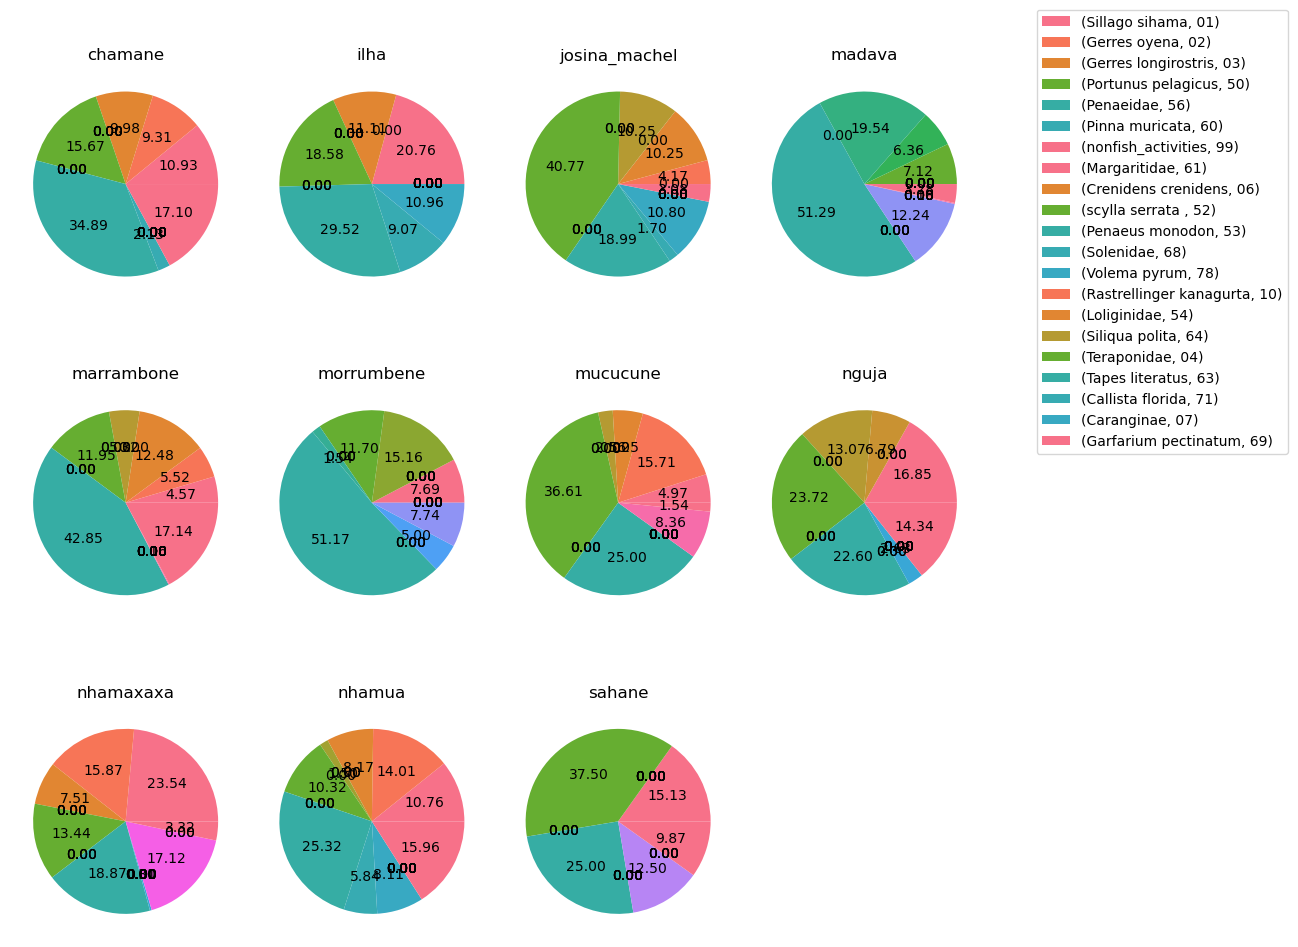

In [ ]:
fig, axes = plt.subplots(3,4, figsize=(10,10))
axe = axes.ravel()

for ax, col in zip(axe, df_pivot_viz.columns):
    df_pivot_viz[col].plot(kind='pie', legend=False, labeldistance=None, ax=ax, autopct='%0.2f', title=col,colors=sns.color_palette("husl", 22))
    ax.set(ylabel='', aspect='equal')

#axe[0].legend(bbox_to_anchor=(0, 0.5))
fig.delaxes(axe[11])

lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    for line in Line:
        if line not in lines:
            lines.append(line)
    for label in Label:
        if label not in labels:
            labels.append(label)


fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

To calculate the proportion of income at the community level, we will need to aggregate columns in the data at the community level. Since columns in the data is currently at the individual respondent level, we will need to 
1. Sum values for income for each resource by community
2. Preserve one instance of total marine income per respondent and sum these values by community
3. Preserve one instance of total non-marine income per respondent and sum these values by community

In [ ]:
# group the totals at the respondent level by selecting only one entry per respondent (since they are duplicated in each row aka each resource in the capture df)
df_res = df.groupby(['focal_resource','ccp']).agg(income_hot=('income_hot', np.mean), 
                                income_cold=('income_cold', np.mean),
                                trade_val_hot=('trade_val_hot', np.mean),
                                trade_val_cold=('trade_val_cold', np.mean),
                                resell_hot=('resell_hot', np.mean),
                                resell_cold=('resell_cold',np.mean)
                                ).reset_index() 
df_res

KeyError: "Column(s) ['income_cold', 'income_hot', 'resell_cold', 'resell_hot', 'trade_val_cold', 'trade_val_hot'] do not exist"

In [ ]:
# group the totals at the resource level by summing the income from capture, trade, and reselling across respondents in a given ccp
df_tot = df.groupby(['id','ccp']).agg(cap_inc_tot_hot=('income_tot_fish_hot', 'first'), 
                                cap_inc_tot_cold=('income_tot_fish_cold', 'first'),
                                trade_inc_tot__hot=('trade_tot_cold', 'first'),
                                trade_inc_tot_cold=('trade_tot_cold', 'first'),
                                resell_inc_tot_hot=('income_resell_hot', 'first'),
                                resell_inc_tot_cold=('income_resell_hot', 'first'),
                                activ_inc_tot_hot=('activity_income_hot', 'first'),
                                activ_inc_tot_cold=('activity_income_cold', 'first'),
                                ).reset_index()
df_tot

KeyError: "Column(s) ['income_resell_hot', 'income_tot_fish_cold', 'income_tot_fish_hot', 'trade_tot_cold'] do not exist"

In [ ]:
df_tot_sum = df_tot.groupby(['ccp']).agg(cap_inc_tot_sum_hot=('cap_inc_tot_hot', np.sum), 
                                cap_inc_tot_sum_cold=('cap_inc_tot_cold', 'first'),
                                trade_inc_tot__hot=('trade_inc_tot__hot', 'first'),
                                trade_inc_tot_cold=('trade_inc_tot_cold', 'first'),
                                resell_inc_tot_hot=('resell_inc_tot_hot', 'first'),
                                resell_inc_tot_cold=('resell_inc_tot_cold', 'first'),
                                activ_inc_tot_hot=('activ_inc_tot_hot', 'first'),
                                activ_inc_tot_cold=('activ_inc_tot_cold', 'first'),
                                ).reset_index()
df_tot_sum

,ccp,cap_inc_tot_sum_hot,cap_inc_tot_sum_cold,trade_inc_tot__hot,trade_inc_tot_cold,resell_inc_tot_hot,resell_inc_tot_cold,activ_inc_tot_hot,activ_inc_tot_cold
0,chamane,76614.733333,0.000000,0.000000,0.000000,0.0,0.0,750.0,750.0
1,ilha,71175.200000,26640.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,josina_machel,76192.619048,3360.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,madava,267841.866667,4320.000000,0.000000,0.000000,1600.0,1600.0,500.0,0.0
4,marrambone,109094.666667,15433.333333,0.000000,0.000000,0.0,0.0,0.0,0.0
5,morrumbene,148347.666667,1100.000000,694.444444,694.444444,1000.0,1000.0,0.0,0.0
6,mucucune,112529.000000,16496.666667,0.000000,0.000000,0.0,0.0,4000.0,4000.0
7,nguja,22448.000000,2880.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,nhamaxaxa,36400.533333,7866.666667,0.000000,0.000000,0.0,0.0,3000.0,3000.0
9,nhamua,109238.000000,333.333333,0.000000,0.000000,0.0,0.0,300.0,300.0
